<a href="https://colab.research.google.com/github/jiiwon129/ESAA/blob/main/OB/%EA%B3%BC%EC%A0%9C/WEEK1/ESAA_OB_WEEK1_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 4 모델 훈련**

### **[개념 정리]**

#### **4.1 선형 회귀**

- 선형 회귀 모델의 예측

  $\hat y$ = $\theta_0$ + $\theta_1x_1$ + $\theta_2x_2$ + $...$ + $\theta_nx_n$

  - $\hat y$: 예측값
  - n: 특성의 수
  - $x_i$: $i$번쩨 특성값
  - $\theta_j$: $j$번째 모델 파라미터 (편향 $\theta_0$, 가중치 $\theta_1, \theta_2, ..., \theta_n$을 포함)

- 선형 회귀 모델의 예측(vector)

  $\hat y$ = $h_\theta(X)$ = $\theta * X$

  - $\theta$: 편향 $\theta_0$, 가중치 $\theta_1, \theta_2, ..., \theta_n$을 담은 모델의 파라미터 벡터
  - $X$: $x_0, ... , x_n$까지 담은 샘플의 특성 벡터 ($x_0$은 항상 1)
  - $\theta * X$: 벡터 $\theta$와 $X$의 dot production --> $\theta_0x_0$ + $\theta_1x_1$ + $\theta_2x_2$ + $...$ + $\theta_nx_n$
  - $h_\theta(X)$: 모델 파라미터 $\theta$를 사용한 가설 함수

---

모델 훈련
- 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것

  --> 먼저 모델이 훈련 데이터에 얼마나 잘 맞는지 측정

- 선형 회귀 모델의 MSE 비용 함수

  MSE($\theta$) = $\frac{1}{n} \sum_{i=1}^{n} (\hat y - y^{(i)})^2$

##### **4.1.1 정규방정식**

정규방정식(normal equation)
- 비용 함수를 최소화하는 $\theta$값을 찾기 위한 해석적인 방법

  $\hat \theta$ = $(X^TX)^{-1}X^Ty$

  - $\hat \theta$: 비용 함수를 최소화하는 \theta 값
  - y: $y^{(1)}, ... ,y^{(n)}$까지 포함하는 target vector

```
np.linalg.inv()
```
- 역행렬 계산
```
_.dot()
```
- 행렬 곱셈
```
np.r_[], np.c_[]
```
- 두 배열을 합치는 명령어
```
_.T
```
- 전치 행렬

LinearRegression 클래스 --> scipy.linalg,lstsq() 기반

```
np.linalg.lstsq()
```
- $\hat \theta$ = $X^+y$ 계산
- $X^+$: $X$의 유사역행렬

```
np.linalg.pinv()
```
- 유사역행렬
```
np.linalg.svd()
```
- 특잇값 분해

##### **4.1.2 계산 복잡도**

역행렬을 계산하는 계산 복잡도
- 일반적으로 $O(n^{2.4})$ ~ $O(n^3)$ 사이
- 사이킷런의 LinearRegression 클래스가 사용하는 SVD --> 약 $O(n^2)$
  - 예측 계산 복잡도는 샘플 수와 특성 수에 선형적

#### **4.2 경사 하강법**

경사 하강법
- 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적 최적화 알고리즘
- 비용 함수를 최소화하기 위해 반복하여 파라미터를 조정

  1. 파라미터 벡터 $\theta$에 대해 비용 함수의 현제 Gradient 계산
  2. Gradient가 감소하는 방향으로 반복 진행
  3. Gradient가 0이 되면 최솟값 도달

  - 즉, $\theta$를 임의값으로 시작하여 한 번에 조금씩 비용 함수가 감소되는 방향을 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상

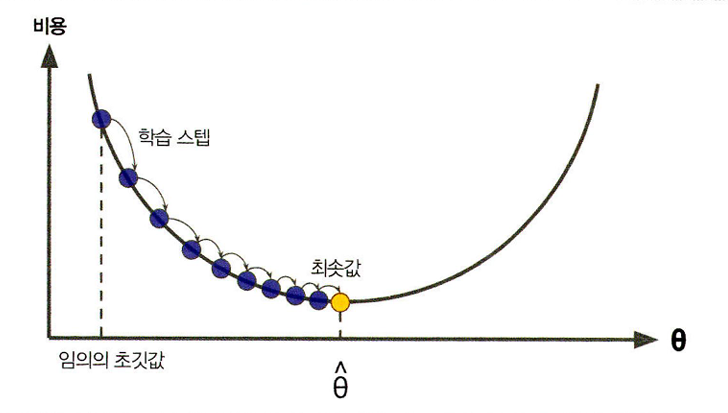

학습률(learning rate)
- 경사 하강법에서 가장 중요한 파라미터

[ 경사 하강법의 문제점 ]

1. 학습률이 너무 작은 경우
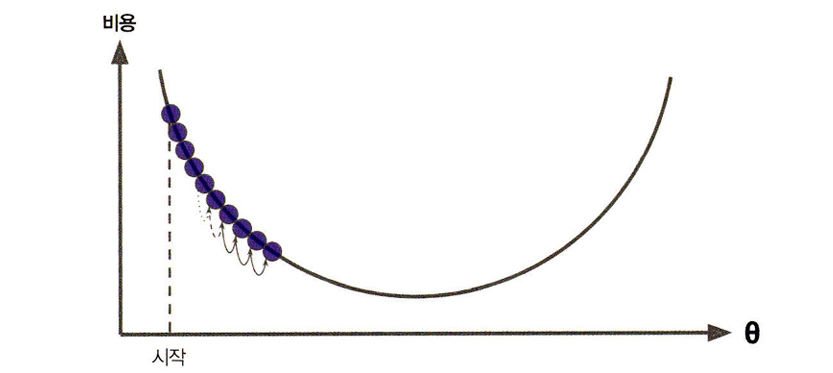

  2. 학습률이 너무 큰 경우
  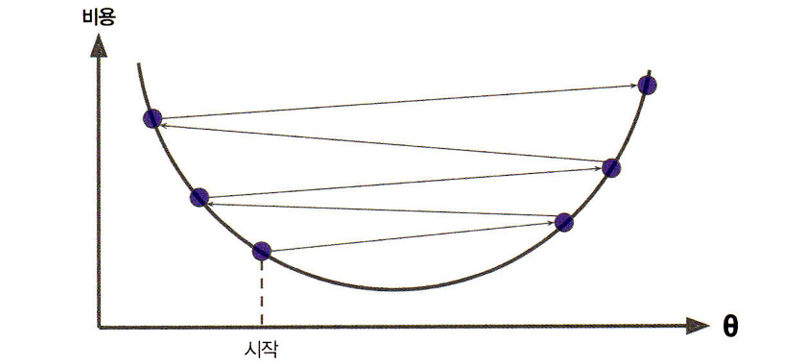

  3. 특이한 지형이 존재할 경우 최솟값으로 수렴하기 어려움
  - 왼쪽에서 시작하면 전역 최솟값보다 좋지 않은 지역 최솟값에 수렴
  - 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달 X
  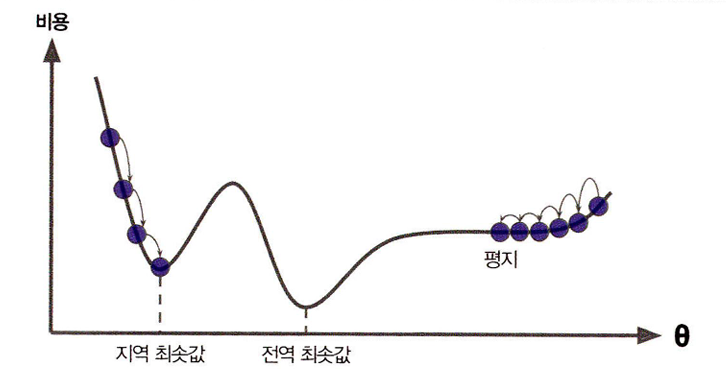

---
**[ 경사 하강법 주의점 ]**
- 경사 하강법을 사용할 때, 반드시 모든 특성이 같은 scale을 갖도록 만들어야함.

--> sklearn의 StandardScaler 등

##### **4.2.1 배치 경사 하강법**

배치 경사 하강법
- 매 경사 하강법 스텝에서 훈련 데이터 전체를 사용 --> 매우 큰 훈련 세트에서는 아주 느린 단점 존재
- 특성 수에 민감하지 않음

  --> ex) 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식이나 SVD 분해보다 경사 하강법을 사용하는 편이 훨씬 빠름

---

**편도함수**

- $\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는 지 계산

- 비용 함수의 편도함수

  $\frac{\partial}{\partial\theta_j} \text{MSE}(\boldsymbol{\theta}) = \frac{2}{m}\sum_{i=1}^{m} (\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})x_j^{(i)}$

  - $\hat y$ = $\boldsymbol{\theta}^T \mathbf{x}^{(i)}$

- 비용 함수의 Gradient vector

  $\nabla_{\boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta}) = \begin{pmatrix}
\frac{\partial}{\partial\theta_0} \text{MSE}(\boldsymbol{\theta}) \\
\frac{\partial}{\partial\theta_1} \text{MSE}(\boldsymbol{\theta}) \\
\vdots \\
\frac{\partial}{\partial\theta_n} \text{MSE}(\boldsymbol{\theta})
\end{pmatrix} = \frac{2}{m}\mathbf{X}^T(\mathbf{X}\boldsymbol{\theta} - \mathbf{y})$

  - $X$: 샘플 수 m, 특성 수 n인 m x n 행렬
  - $\theta$: n개의 파라미터를 가진 n x 1 벡터
  - 편도함수 한꺼번에 계산 가능

--> 최종 계산 결과: 파라미터 수와 같은 n x 1 벡

- 경사 하강법의 스텝

  $\boldsymbol{\theta}^{\text{(next step)}} = \boldsymbol{\theta} - \eta \nabla_{\boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})$

  - $\eta$: 학습률(learning rate)

  위로 향하는 Gradient vector가 구해지면 반대 방향인 아래로 가야 하므로 $\theta$에서 $\nabla_{\boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})$를 빼야함
  - 여기서 $\eta$는 내려가는 스텝의 크기

**[반복 횟수 및 학습률 설정]**
- 학습률 --> GridSearch
- 반복 횟수 --> 반복 횟수를 아주 크게 지정 후, Gradient vector가 아주 작아지면 (벡터의 노름이 어떤 값 $\epsilon$ (허용오차)보다 작아지면) 경사 하강법이 거의 최솟값에 도달 --> 알고리즘 중지!

##### **4.2.2 확률적 경사 하강법**

확률적 경사 하강법
- 매 스텝에서 한 개의 샘플을 무작위로 선택 후 그 하나의 샘플에 대한 Gradient 계산

  --> 매 반복에서 다뤄야하는 데이터가 매우 적기 때문에 알고리즘이 상대적으로 빠름

  (배치 경사 하강법: 전체 데이터세트를 사용해서 느림)

- 확률적(무작위)이기 때문에 배치 경사 하강법보다 훨씬 불안정

  --> 비용 함수가 매우 불규칙
  
  --> 알고리즘이 지역 최솟값을 건너뛸 수 있도록 도와주므로 전역 최솟값을 찾을 가능성이 배치 경사 하강법보다 높음

  - 하지만, 전역 최솟값에 다다르지 못할 수 있기 때문에 이 관점에서는 좋지 않음

--> 학습률을 점진적으로 감소시키는 것이 해결책!

- 시작할 때는 학습률을 크게 설정 --> 점차 작게 줄여 알고리즘이 전역 최솟값에 도달하도록 함

---

학습 스케줄(learning schedule)
- 매 반복에서 학습률을 결정하는 함수

  --> 학습률을 고정하지 않고, 학습 과정에 따라 동적으로 조절

---

from sklearn.linear_model import SGDRegressor
```
SGDRegressor(max_iter, tol, penalty, eta0)
```
- max_iter: 에포크 수
- tol: ex) tol=1e-3 --> 한 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행
- eta0: 학습률
- penalty: 규제

```
_.ravel()
```
- 1차원 배열로 반환
- _.flatten()과 차이점 --> _.ravel()은 1차원 배열의 뷰(view)를 반환, _.flatten()은 1차원 배열의 새로운 복사본 반환

  --> 메모리 사용량을 절약하고 싶거나 원본 배열을 수정할 의도가 있으면 _.ravel(), 독립적인 1차원 배열이 필요하다면 _.flatten()을 사용!

##### **4.2.3 미니배치 경사 하강법**

미니배치 경사 하강법
- 미니배치라 부르는 작은 샘플 세트에 대해 Gradient 계산
  - SGD에 비해 GPU를 사용하여 얻는 성능 향상이 장점

- 미니배치를 크게 하면 SGD보다 덜 불규칙하게 움직임 --> SGD보다 최솟값에 더 가까이 도달

  --> 하지만 SGD에 비해 지역 최솟값에서 빠져나오기 더 힘들지도 모른다는 단점!

##### **선형 회귀를 사용한 알고리즘 비교**

m: 훈련 샘플 수, n: 특성 수

| 알고리즘 | m이 클 때 | 외부 메모리 학습 지원 | n이 클 때 | 하이퍼파라미터 수 | 스케일 조정 필요 | 사이킷런 |
|---|---|---|---|---|---|---|
| 정규방정식 | 빠름 | No | 느림 | 0 | No | N/A |
| SVD | 빠름 | No | 느림 | 0 | No | LinearRegression |
| 배치 경사 하강법 | 느림 | No | 빠름 | 2 | Yes | SGDRegressor |
| 확률적 경사 하강법 | 빠름 | Yes | 빠름 | ≥2 | Yes | SGDRegressor |
| 미니배치 경사 하강법 | 빠름 | Yes | 빠름 | ≥2 | Yes | SGDRegressor |

** 해당 알고리즘들은 훈련 결과에 거의 차이가 없음. 모두 매우 비슷한 모델을 만들고 정확히 같은 방식으로 예측 진행

#### **4.3 다항 회귀**

다항 회귀
- 비선형 데이터를 학습할 때 사용

from sklearn.preprocessing import PolynomialFeatures
```
PolynomialFeatures(degress, include_bias)
```
- 주어진 차수까지 특성 간의 모든 교차항 추가

  --> ex) 두 개의 특성 $a, b$가 있을 때 `degree=3`으로 `PolynomialFeatures`를 적용하면 $a^2, a^3, b^2, b^3$뿐만 아니라 $ab, a^2b, ab^2$도 특성으로 추가

---

**CAUTION** `_PolynomialFeatures(degree=d)`는 특성이 $n$개인 배열을 특성이 $\frac{(n+d)!}{d!n!}$개인 배열로 변환
--> 여기서 $n!$은 $n$의 팩토리얼로 $1\times2\times3\times\cdots\times n$과 같습니다. 특성 수가 교차항을 포함해 엄청나게 늘어날 수 있으니 주의!

---



#### **4.4 학습 곡선**

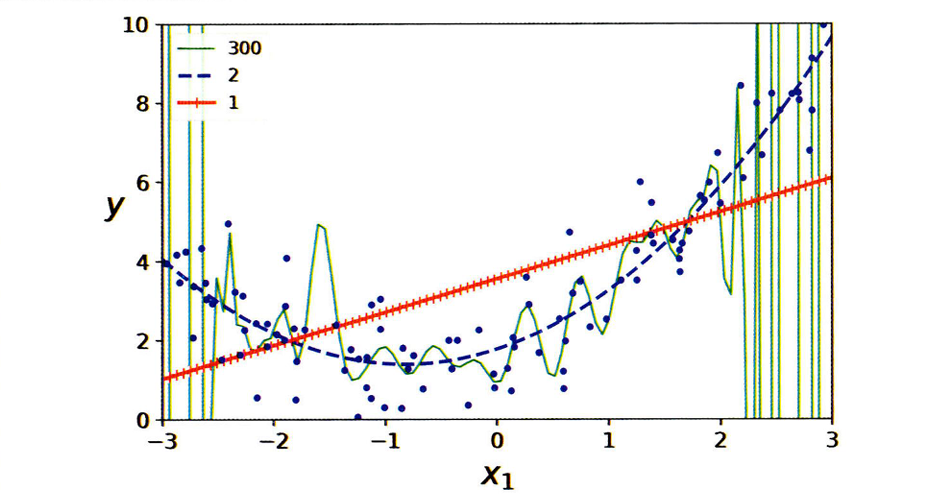

- 고차 다항 회귀 모델 --> 과대 적합
- 선형 모델 --> 과소 적합
---

만약 훈련 데이터에서 성능이 좋지만, 교차 검증 점수가 나쁘다면 모델 --> `과대 적합`

만약 양쪽에 모두 좋지 않으면 모델 --> `과소 적합`

[과대적합 모델을 개선하는 방법]
- 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가

##### **편향(bias)/분산(variance) 트레이드오프**

1. 편향(Bias)
- 일반화 오차 중 편향은 잘못된 가정으로 인한 것

  ex) 데이터가 실제로는 2차인데 선형으로 가정하는 경우

- 편향이 큰 모델은 훈련 데이터에 `과소적합`되기 쉬움

2. 분산(variance)
- 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 발생
- 자유도가 높은 모델(ex. 고차 다항 회귀)이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향

3. 줄일 수 없는 오차
- 데이터 자체에 있는 잡음 때문에 발생

  --> 해결책은 데이터의 잡음을 제거하는 것
---

모델의 복잡도가 커지면 `분산 증가` `편향 감소`

모델의 복잡도가 줄어들면 `편향 증가` `분산 감소`

### **[필사]**

#### **4.1 선형 회귀**

##### **4.1.1 정규방정식**

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x + 가우시안 잡음

In [ ]:
X_b = np.c_[np.ones((100,1)), X] # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.20448995],
       [3.00325212]])

잡음 때문에 원래 함수의 파라미터를 정확하게 재현하지 못함.

$\hat \theta$을 사용하여 예측 진행

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.20448995],
       [10.2109942 ]])

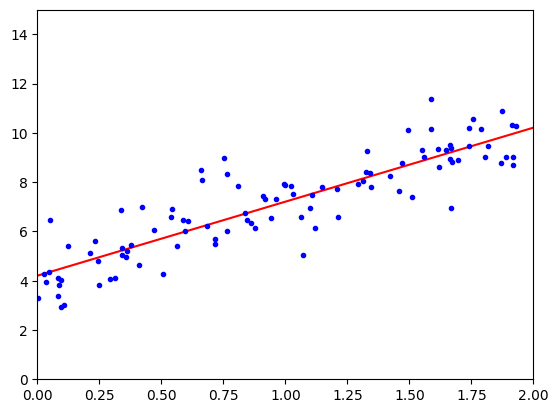

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

사이킷런

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.20448995]), array([[3.00325212]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 4.20448995],
       [10.2109942 ]])

함수 직접 호출

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.20448995],
       [3.00325212]])

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.20448995],
       [3.00325212]])

##### **4.2.1 배치 경사 하강법**

In [ ]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [ ]:
theta

array([[4.20448995],
       [3.00325212]])

##### **4.2.2 확률적 경사 하강법**

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터 --> 학습률의 감소 속도 조절

def learning_schedule(t): # 반복 횟수 t에 따라 학습률을 계산하는 함수
  return t0 / (t + t1) # t가 증가할수록 학습률은 점진적으로 감소

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m): # 전체 데이터셋의 크기(m)만큼 반복하며 SGD(확률적 경사 하강) 업데이트 수행
    random_index = np.random.randint(m) # 무작위로 하나의 샘플 선택
    xi = X_b[random_index:random_index+1] # 무작위로 선택된 샘플의 특성
    yi = y[random_index:random_index+1] # 무작위로 선택된 샘플의 타겟값
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.15849838],
       [3.03222487]])

사이킷런의 SGD

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

y --> m x 1 vector --> 1차원 배열로 반환하기 위해 y.ravel()

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21824245]), array([3.03273068]))

##### **4.2.3 미니배치 경사 하강법**

#### **4.3 다항 회귀**

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

sklearn의 PolynomialFeatures를 사용해 훈련 데이터 변환

--> 훈련 세트에 있는 각 특성을 제곱(2차 다항)하여 새로운 특성으로 추가

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X[0]

array([1.81775686])

In [ ]:
X_poly[0]

array([1.81775686, 3.30423998])

원래 특성 X와 이 특성의 제곱을 포함

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.73038596]), array([[1.19270425, 0.39188168]]))

#### **4.4 학습 곡선**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sort(train_errors), "r-+", linewidth=2, label="train set")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="test set")
  plt.legend()

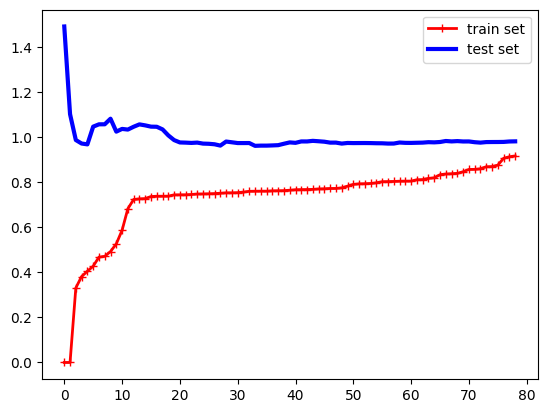

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

전형적인 `과소적합` 모델

동일한 데이터에서 10차 다항 회귀 모델의 학습 곡선

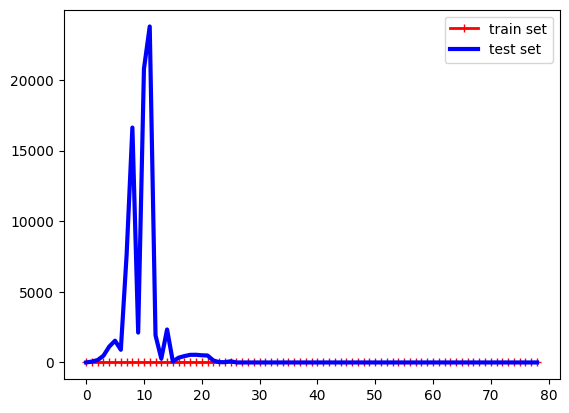

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("Poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 나음
- 두 곡선 사이의 공간 --> 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 이는 `과대적합` 모델의 특징